<a href="https://colab.research.google.com/github/kavita07lamani/ML-project/blob/main/Car_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing The Dependencies

In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


Data Collection

In [3]:
df=pd.read_csv('/content/car data.csv')

In [4]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


Data preprocessing

In [5]:
# number rows and columns
df.shape

(301, 9)

In [6]:
#general information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [7]:
#number of missing values
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

Encoding Categorical Data

In [8]:
#checking distrubution of categorical data
print(df.Fuel_Type.value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64


In [10]:
print(df.Seller_Type.value_counts())

Dealer        195
Individual    106
Name: Seller_Type, dtype: int64


In [11]:
print(df.Transmission.value_counts())

Manual       261
Automatic     40
Name: Transmission, dtype: int64


In [17]:
# encoding "Fuel_Type" column
df.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)

# encoding "seller_type" column
df.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)

#encoding "Transmission" column
df.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

In [18]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


Spliting data into Trainning and Testing

In [21]:
# trainning data
X=df.drop(['Car_Name','Selling_Price'],axis=1)
X.head(2)

,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,5.59,27000,0,0,0,0
1,2013,9.54,43000,1,0,0,0


In [23]:
# testing data
y=df['Selling_Price']
y.head(2)

0    3.35
1    4.75
Name: Selling_Price, dtype: float64

In [24]:
#splitting trainnnd and testing data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=2)

1.Linear Regression Model

In [26]:
#loding the linear rigression model trainning
from sklearn.linear_model import LinearRegression
lin_reg_model=LinearRegression()
lin_reg_model.fit(X_train,y_train)

LinearRegression()

Predicton on Trainning and Testing

In [46]:
#prediction on trainning data
train_pred=lin_reg_model.predict(X_train)

In [40]:
#prediction on test data
test_pred=lin_reg_model.predict(X_test)


Model Evaluation

In [30]:
#load r2_score performance metrics
from sklearn.metrics import r2_score

In [35]:
# error score of trainning
error_score= r2_score(y_train,train_pred)
print('R_Square_Error of trainning : ',error_score)

R_Square_Error of trainning :  0.8799451660493711


In [42]:
# error score of testing
error_score=r2_score(y_test,test_pred)
print('R_Square_Error of testing : ',error_score)

R_Square_Error of testing :  0.8365766715027051


Visualize the actual prices and  Pridicted prices

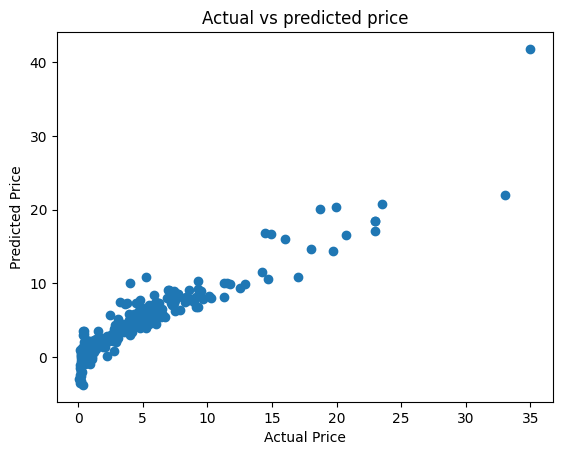

In [38]:
# visualizeatio on trainning data
plt.scatter(y_train,train_pred)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs predicted price')
plt.show()

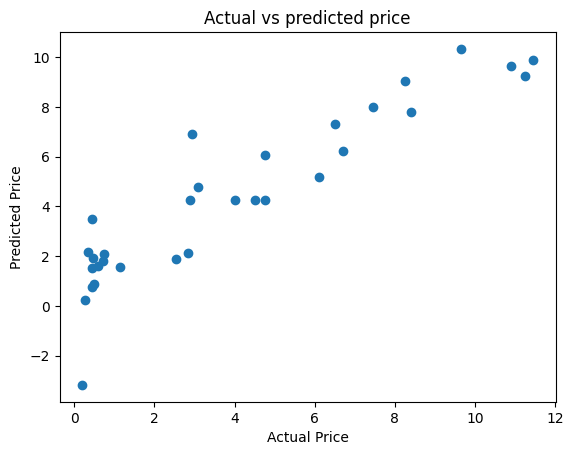

In [43]:
# visualization on test data
plt.scatter(y_test,test_pred)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs predicted price')
plt.show()

2.Lasso regression

In [45]:
#import lasso regression model
from sklearn.linear_model import Lasso
lasso_reg_model=Lasso()
lasso_reg_model.fit(X_train,y_train)

Lasso()

Predicton on Trainning and Testing usiing Lasso Regression

In [47]:
#prediction on trainning data
train_pred=lasso_reg_model.predict(X_train)

In [48]:
#prediction on test data
test_pred=lasso_reg_model.predict(X_test)


Model Evaluation

In [50]:
#load r2_score performance metrics
from sklearn.metrics import r2_score

In [51]:
# error score of trainning
error_score= r2_score(y_train,train_pred)
print('R_Square_Error of trainning : ',error_score)

R_Square_Error of trainning :  0.8427856123435794


In [52]:
# error score of testing
error_score=r2_score(y_test,test_pred)
print('R_Square_Error of testing : ',error_score)

R_Square_Error of testing :  0.8709167941173195


Visualize the actual prices and  Pridicted prices

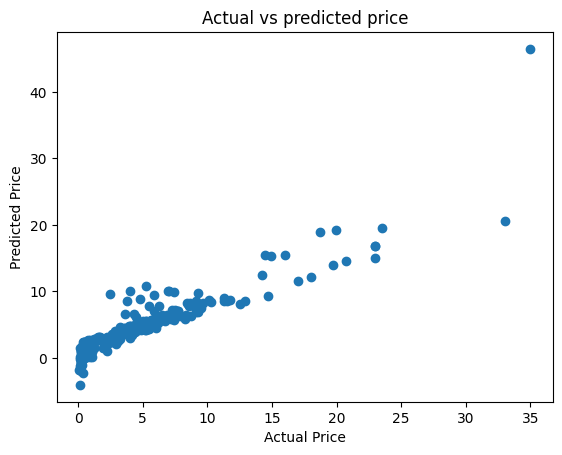

In [53]:
# visualizeatio on trainning data
plt.scatter(y_train,train_pred)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs predicted price')
plt.show()

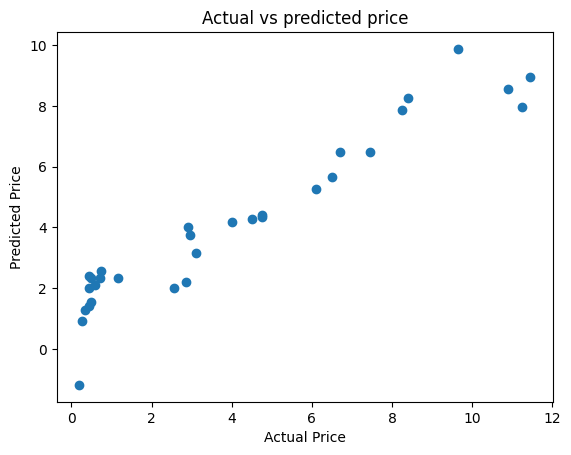

In [54]:
# visualization on test data
plt.scatter(y_test,test_pred)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs predicted price')
plt.show()